# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     - ----------------------------------- 20.5/675.6 kB 330.3 kB/s eta 0:00:02
     - ----------------------------------- 30.7/675.6 kB 435.7 kB/s eta 0:00:02
     --- --------------------------------- 61.4/675.6 kB 469.7 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/675.6 kB 476.3 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/675.6 kB 504.4 kB/s eta 0:00:02
     ------- ---------------------------- 133.1/675.6 kB 491.5 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/675.6 kB 473.7 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/675.6 kB 473.7 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/675.6 kB 473.7 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/675.6 kB 473.7 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/675.6 kB 473.7 kB/s eta 0:00:02
     ------- ---------------------------- 143.4

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


In [6]:
cities

['sao gabriel da cachoeira',
 'villa paula de sarmiento',
 'faya-largeau',
 'capinota',
 'uturoa',
 'tazacorte',
 'grytviken',
 'bilibino',
 'troitsko-pechorsk',
 'juegang',
 'remontnoye',
 'ushuaia',
 'yellowknife',
 'pucheng',
 'susaki',
 'constantia',
 'luderitz',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'blackmans bay',
 'puerto natales',
 'westport',
 'utrik',
 'tiksi',
 'puerto ayora',
 'klyuchi',
 'chonchi',
 'geraldton',
 'ploneour-lanvern',
 'agra',
 'adamstown',
 'waitangi',
 'lampang',
 'cabo san lucas',
 'devinuwara',
 'rundu',
 "severobaykal'sk",
 'guerrero negro',
 'colonia',
 'conduaga',
 'avarua',
 'kuta',
 'margate',
 'kingscliff',
 'al qusayr',
 'kone',
 'budva',
 'whitehorse',
 'masterton',
 'talnakh',
 'ballina',
 'ola',
 'nyurba',
 'el fasher',
 'san nicolas de bari',
 'bodaybo',
 'saint-philippe',
 'portland',
 'antsiranana',
 'saipan',
 'adler',
 'thompson',
 'hoxtolgay',
 'muncar',
 'odda',
 'taitung city',
 'vila velha',
 'bethel',
 'port elizabet

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=6213940850d3986ed27ce1cefcd5e625&q=san francisco


In [18]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
# Define an empty list to fetch the weater data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao gabriel da cachoeira
Processing Record 2 of Set 1 | villa paula de sarmiento
Processing Record 3 of Set 1 | faya-largeau
Processing Record 4 of Set 1 | capinota
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | tazacorte
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | troitsko-pechorsk
Processing Record 10 of Set 1 | juegang
Processing Record 11 of Set 1 | remontnoye
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | pucheng
Processing Record 15 of Set 1 | susaki
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | puerto natales
Pr

Processing Record 39 of Set 4 | mvomero
Processing Record 40 of Set 4 | uray
Processing Record 41 of Set 4 | pedregal
Processing Record 42 of Set 4 | alotau
City not found. Skipping...
Processing Record 43 of Set 4 | sarakhs
Processing Record 44 of Set 4 | dolores
Processing Record 45 of Set 4 | kailua-kona
Processing Record 46 of Set 4 | tulun
Processing Record 47 of Set 4 | kijang
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | luanda
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | yuzhno-kurilsk
Processing Record 2 of Set 5 | saudarkrokur
Processing Record 3 of Set 5 | borogontsy
Processing Record 4 of Set 5 | conceicao da barra
Processing Record 5 of Set 5 | keflavik
Processing Record 6 of Set 5 | ambert
Processing Record 7 of Set 5 | ouadda
Processing Record 8 of Set 5 | puerto deseado
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | waingapu
Processing Record 11 of Set 5 | watertown
Processing Record 

Processing Record 28 of Set 8 | villapinzon
Processing Record 29 of Set 8 | natitingou
Processing Record 30 of Set 8 | novyy urengoy
Processing Record 31 of Set 8 | kovdor
Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | la rinconada
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 37 of Set 8 | medina
Processing Record 38 of Set 8 | ghat
Processing Record 39 of Set 8 | ulety
Processing Record 40 of Set 8 | betare oya
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | oriximina
Processing Record 43 of Set 8 | la sarre
Processing Record 44 of Set 8 | james island
City not found. Skipping...
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | ak'ordat
Processing Record 48 of Set 8 | ciudad lazaro cardenas
Processing Record 49 of Set 8 | hun
Processing Record 0 of Set

Processing Record 17 of Set 12 | quepos
Processing Record 18 of Set 12 | shiguai
Processing Record 19 of Set 12 | bouake
Processing Record 20 of Set 12 | bairnsdale
Processing Record 21 of Set 12 | nizhneudinsk
Processing Record 22 of Set 12 | nadi
Processing Record 23 of Set 12 | black river
Processing Record 24 of Set 12 | happy valley-goose bay
Processing Record 25 of Set 12 | uttar char fasson
Processing Record 26 of Set 12 | bani walid
Processing Record 27 of Set 12 | nema
Processing Record 28 of Set 12 | usinsk
Processing Record 29 of Set 12 | mountain home
Processing Record 30 of Set 12 | dori
Processing Record 31 of Set 12 | kismayo
Processing Record 32 of Set 12 | mahanoro
Processing Record 33 of Set 12 | la paz
Processing Record 34 of Set 12 | labytnangi
Processing Record 35 of Set 12 | cafayate
Processing Record 36 of Set 12 | keren
Processing Record 37 of Set 12 | isna
Processing Record 38 of Set 12 | onega
Processing Record 39 of Set 12 | elmendorf air force base
City not 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.28,92,93,0.30,BR,1706325621
1,villa paula de sarmiento,-31.4933,-68.5384,30.70,28,99,10.42,AR,1706325623
2,faya-largeau,17.9257,19.1043,14.18,36,94,9.02,TD,1706325625
3,capinota,-17.7167,-66.2333,17.67,73,77,3.22,BO,1706325626
4,uturoa,-16.7333,-151.4333,28.38,74,50,3.45,PF,1706325627


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.28,92,93,0.30,BR,1706325621
1,villa paula de sarmiento,-31.4933,-68.5384,30.70,28,99,10.42,AR,1706325623
2,faya-largeau,17.9257,19.1043,14.18,36,94,9.02,TD,1706325625
3,capinota,-17.7167,-66.2333,17.67,73,77,3.22,BO,1706325626
4,uturoa,-16.7333,-151.4333,28.38,74,50,3.45,PF,1706325627


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

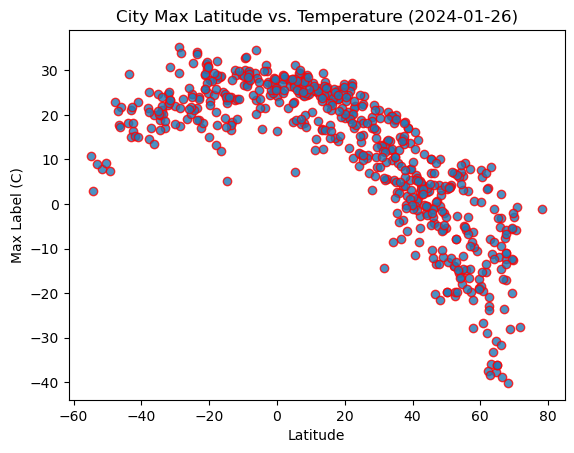

In [29]:
import time
# Build scatter plot for latitude vs. temperature
plt.scatter(
    
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cites"


)
# Incorporate the other graph properties
# YOUR CODE HERE
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Label (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

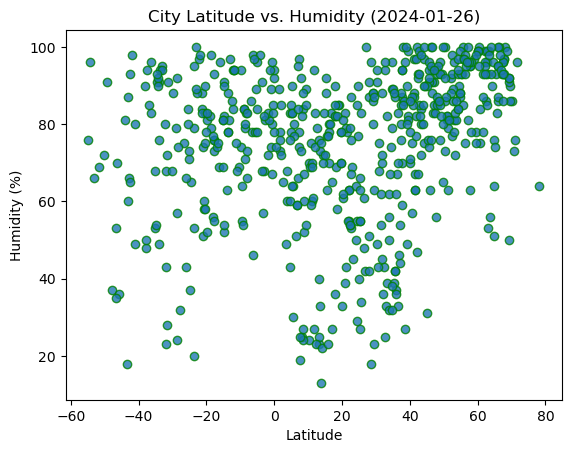

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cites"


)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

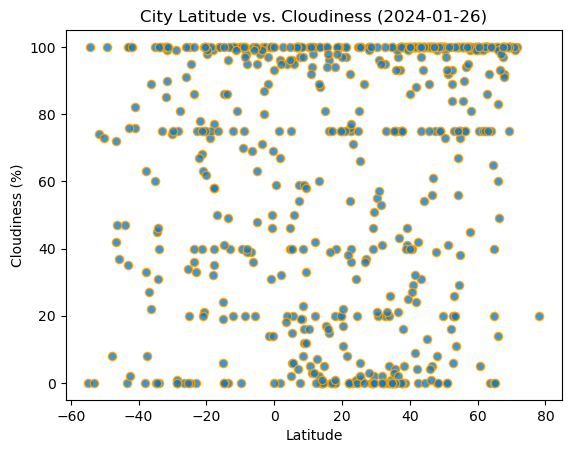

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cites"


)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

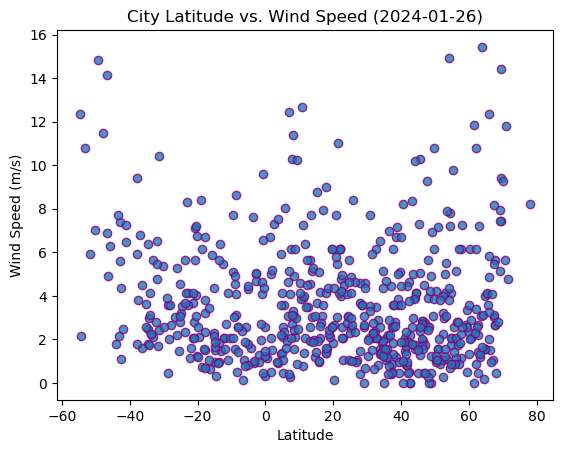

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cites"


)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    #compute linear regession
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel ("Lat")
    plt.ylabel (title)
    print(f"The r_value is {rvalue ** 2}")
    plt.show()





In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,faya-largeau,17.9257,19.1043,14.18,36,94,9.02,TD,1706325625
5,tazacorte,28.6290,-17.9293,22.30,18,0,3.58,ES,1706325627
7,bilibino,68.0546,166.4372,-40.14,100,100,0.44,RU,1706325628
8,troitsko-pechorsk,62.7084,56.1964,-7.95,96,100,2.68,RU,1706325629
9,juegang,32.3174,121.1855,5.54,43,0,2.40,CN,1706325397


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.28,92,93,0.30,BR,1706325621
1,villa paula de sarmiento,-31.4933,-68.5384,30.70,28,99,10.42,AR,1706325623
3,capinota,-17.7167,-66.2333,17.67,73,77,3.22,BO,1706325626
4,uturoa,-16.7333,-151.4333,28.38,74,50,3.45,PF,1706325627
6,grytviken,-54.2811,-36.5092,2.84,96,100,2.15,GS,1706325628


###  Temperature vs. Latitude Linear Regression Plot

The r_value is 0.7259245633502501


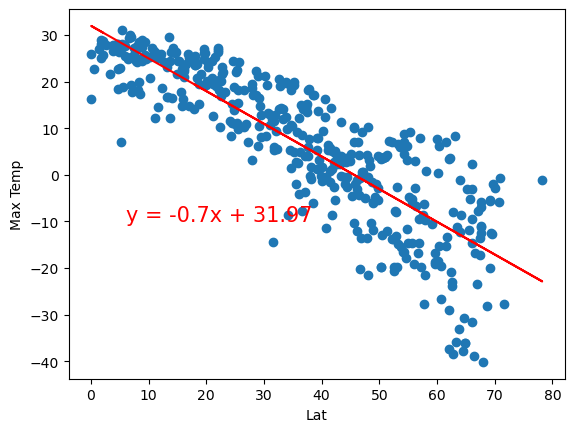

In [49]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r_value is 0.28343170696481684


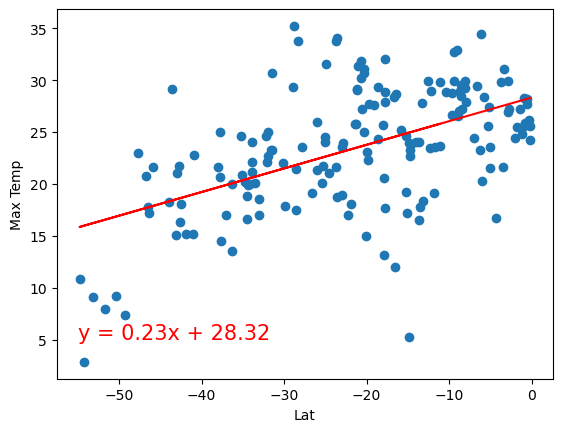

In [58]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the two plots above there is weak linear relationship between x and y.

### Humidity vs. Latitude Linear Regression Plot

The r_value is 0.1980821948605634


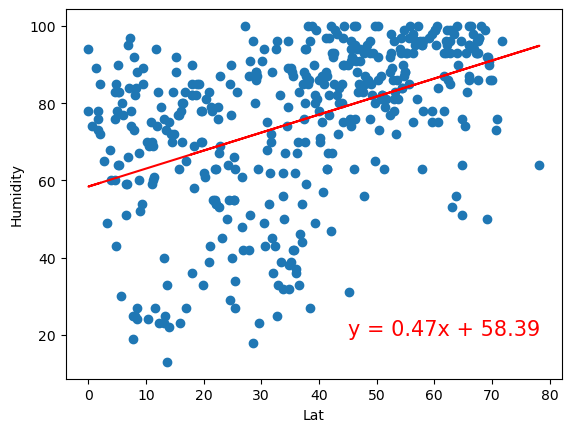

In [60]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,20))

The r_value is 0.05426796900009613


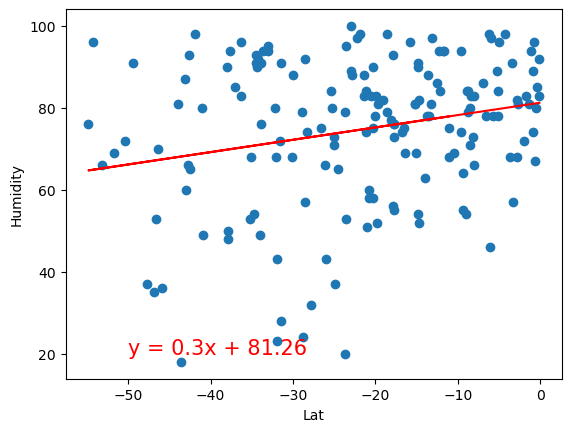

In [61]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the two plots above there is weak linear relationship between x and y.

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is 0.08933579413253043


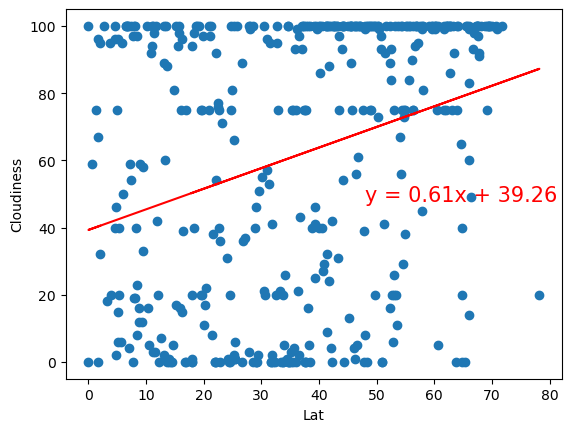

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (48,48))

The r_value is 0.034752084678216354


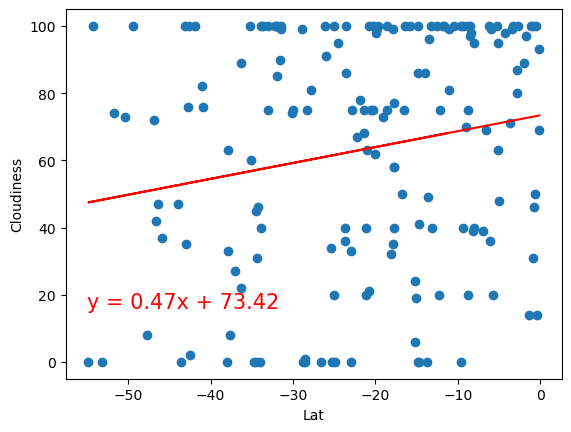

In [74]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,16))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the two plots above there is weak linear relationship between x and y.

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is 0.0015100080285794953


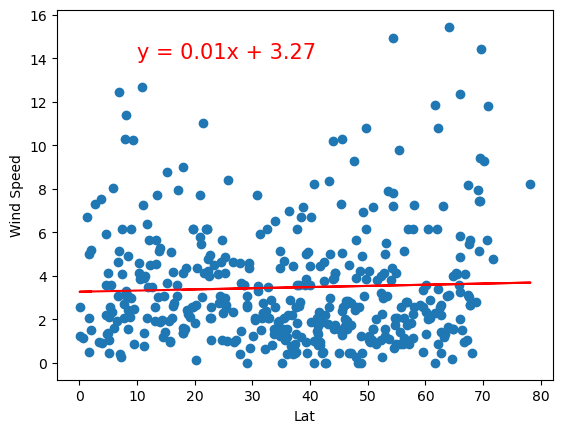

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,14))

The r_value is 0.15455772757356318


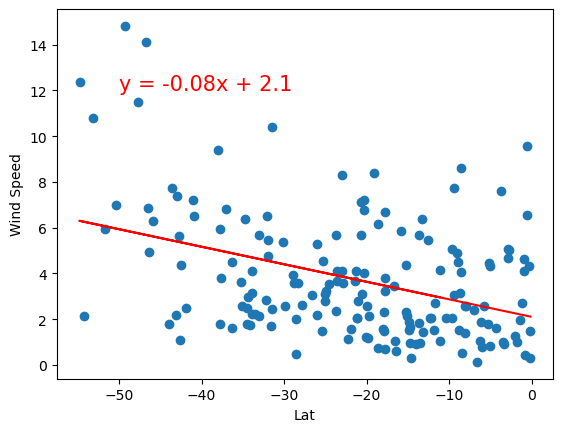

In [76]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the two plots above there is strong linear relationship between x and y.